In [3]:
# Obtener archivo csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

file_path = Path('C:/Users/yamak/Desktop/Portafolio/Proyecto 01/Finanzas personales/CSV/todas_las_tablas_limpias_v2.csv')

df = pd.read_csv(file_path)
df["Cargos"] = df["Cargos"].fillna(0)
df["Abonos"] = df["Abonos"].fillna(0)
df["Saldo"] = df["Saldo"].fillna(0)
print(df.tail())

      ID Fecha transaccion Fecha reflejado                       Descripcion  \
673  895        28-08-2025      28-08-2025        CARGO POR IMPUESTO 4X1.000   
674  896        28-08-2025      28-08-2025   COMPRA POS ASC DLO*DiDi Food CO   
675  897        28-08-2025      28-08-2025        CARGO POR IMPUESTO 4X1.000   
676  898        28-08-2025      28-08-2025  COMPRA POS ASC TDA D CAFE JUAN V   
677  899        29-08-2025      31-08-2025     ABONO POR INTERESES DE CUENTA   

      Cargos  Abonos      Saldo     source_pdf Descripcion detalle  \
673    106.0     0.0  8496726.2  08-Agosto.pdf            Impuesto   
674  26448.0     0.0  8470278.2  08-Agosto.pdf                Didi   
675    135.0     0.0  8470143.2  08-Agosto.pdf            Impuesto   
676  33800.0     0.0  8436343.2  08-Agosto.pdf         Juan Valdez   
677      0.0    66.0  8436409.2  08-Agosto.pdf                Otro   

    Categoria movimiento  
673             Impuesto  
674         Aplicaciones  
675             I

In [4]:
""" 
Revision inicial de los datos

df.info() → Tipos de datos y valores nulos. ✅
df.describe() → Estadísticas básicas (promedios, máximos, mínimos, etc.). ✅
df.isna().sum() → Revisión de nulos o inconsistencias. ✅

"""

' \nRevision inicial de los datos\n\ndf.info() → Tipos de datos y valores nulos. ✅\ndf.describe() → Estadísticas básicas (promedios, máximos, mínimos, etc.). ✅\ndf.isna().sum() → Revisión de nulos o inconsistencias. ✅\n\n'

In [5]:
#Tipos de datos y valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    678 non-null    int64  
 1   Fecha transaccion     678 non-null    object 
 2   Fecha reflejado       677 non-null    object 
 3   Descripcion           678 non-null    object 
 4   Cargos                678 non-null    float64
 5   Abonos                678 non-null    float64
 6   Saldo                 678 non-null    float64
 7   source_pdf            678 non-null    object 
 8   Descripcion detalle   678 non-null    object 
 9   Categoria movimiento  678 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 53.1+ KB


In [6]:
#Hay un dato perdido en la columna fecha reflejado en el df.info() anterior.
#Se procede a rellenar con la fecha de la columna fecja transaccion.
df['Fecha reflejado'] = df['Fecha reflejado'].fillna(df['Fecha transaccion'])

In [7]:
# Estadísticas básicas
df.describe()

,ID,Cargos,Abonos,Saldo
count,678.000000,6.780000e+02,6.780000e+02,6.780000e+02
mean,560.497050,4.859520e+04,4.601392e+04,7.998742e+06
std,195.867104,1.696831e+05,4.231473e+05,2.248823e+06
min,222.000000,0.000000e+00,0.000000e+00,4.357218e+06
25%,391.250000,9.425000e+01,0.000000e+00,6.084689e+06
50%,560.500000,1.796000e+03,0.000000e+00,7.382115e+06
75%,729.750000,2.897625e+04,0.000000e+00,9.820308e+06
max,899.000000,2.750000e+06,5.396371e+06,1.292870e+07


In [8]:
# Revisión de nulos o inconsistencias.
df.isna().sum()

ID                      0
Fecha transaccion       0
Fecha reflejado         0
Descripcion             0
Cargos                  0
Abonos                  0
Saldo                   0
source_pdf              0
Descripcion detalle     0
Categoria movimiento    0
dtype: int64

In [9]:
""" 
Distribuciones clave

Histograma de montos (sns.histplot(df["valor"]))
Conteo por categoría o tipo de transacción (alimentación, transporte, ingreso, etc.)
Gráficos de gastos vs ingresos mensuales
Top 10 categorías donde más gastas

"""

' \nDistribuciones clave\n\nHistograma de montos (sns.histplot(df["valor"]))\nConteo por categoría o tipo de transacción (alimentación, transporte, ingreso, etc.)\nGráficos de gastos vs ingresos mensuales\nTop 10 categorías donde más gastas\n\n'

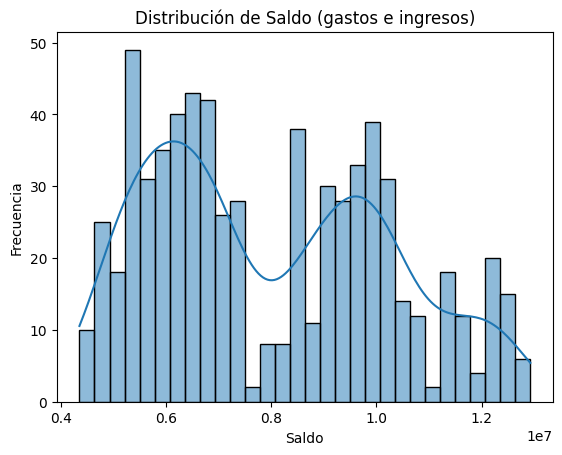

In [10]:
# Histograma de Saldo
sns.histplot(df["Saldo"], bins=30, kde=True)
plt.title("Distribución de Saldo (gastos e ingresos)")
plt.xlabel("Saldo")
plt.ylabel("Frecuencia")
plt.show()

Text(0.5, 1.0, 'Evolución del saldo en el tiempo')

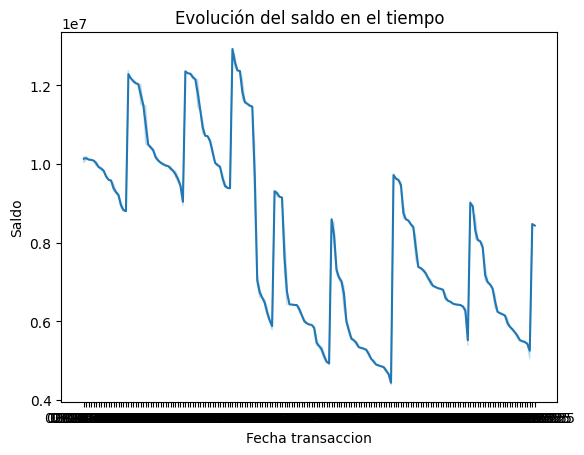

In [11]:
sns.lineplot(x="Fecha transaccion", y="Saldo", data=df)
plt.title("Evolución del saldo en el tiempo")

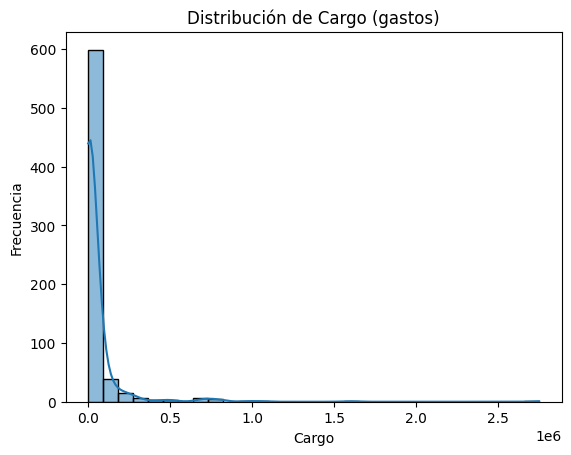

In [12]:
sns.histplot(df["Cargos"], bins=30, kde=True)
plt.title("Distribución de Cargo (gastos)")
plt.xlabel("Cargo")
plt.ylabel("Frecuencia")
plt.show()

Text(0.5, 1.0, 'Evolución del Cargos en el tiempo')

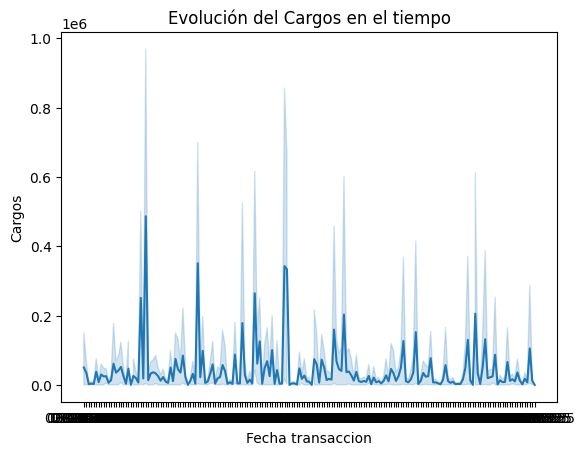

In [13]:
sns.lineplot(x="Fecha transaccion", y="Cargos", data=df)
plt.title("Evolución del Cargos en el tiempo")

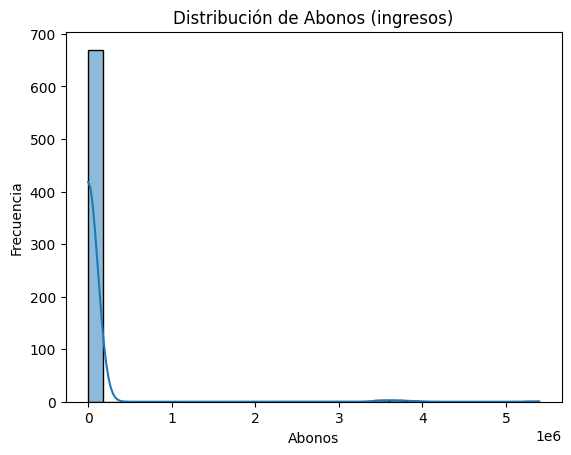

In [14]:
sns.histplot(df["Abonos"], bins=30, kde=True)
plt.title("Distribución de Abonos (ingresos)")
plt.xlabel("Abonos")
plt.ylabel("Frecuencia")
plt.show()

Text(0.5, 1.0, 'Evolución del Abonos en el tiempo')

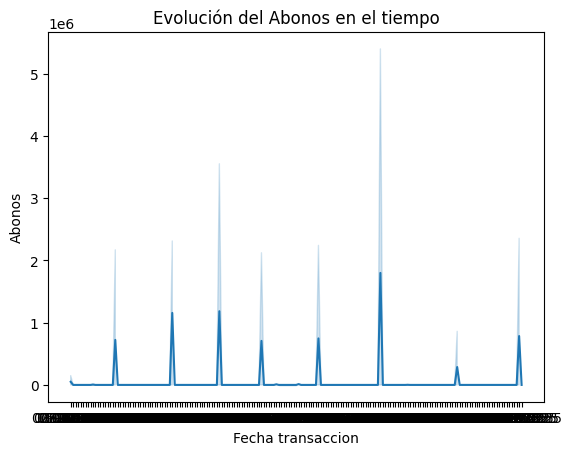

In [15]:
sns.lineplot(x="Fecha transaccion", y="Abonos", data=df)
plt.title("Evolución del Abonos en el tiempo")

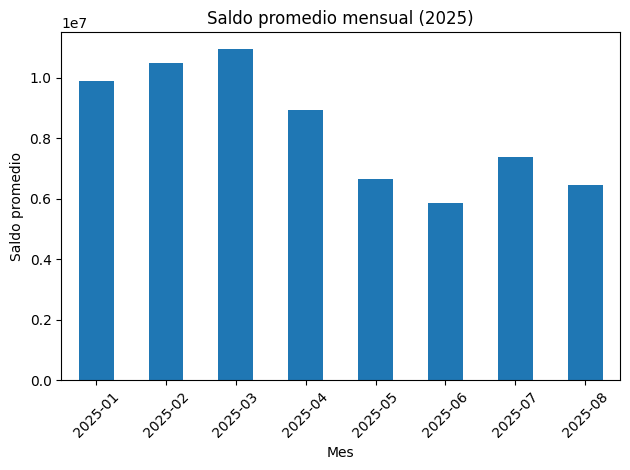

In [16]:
df["Fecha transaccion"] = pd.to_datetime(df["Fecha transaccion"],  format="%d-%m-%Y" ,errors="coerce")
#df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean().plot(kind="bar")
#print( df["Fecha transaccion"].dt.to_period("M").unique())
mensual = df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean()
mensual[mensual.notna()].plot(kind="bar")
plt.title("Saldo promedio mensual (2025)")
plt.ylabel("Saldo promedio")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Fecha transaccion'>

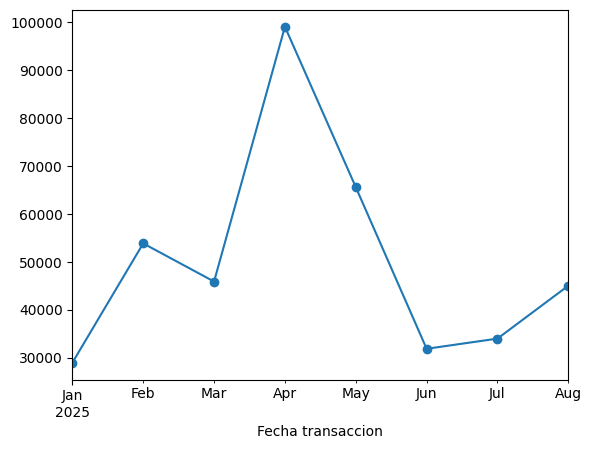

In [17]:
# Lineas de tiempo de cargo mensual
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Cargos"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

<Axes: xlabel='Fecha transaccion'>

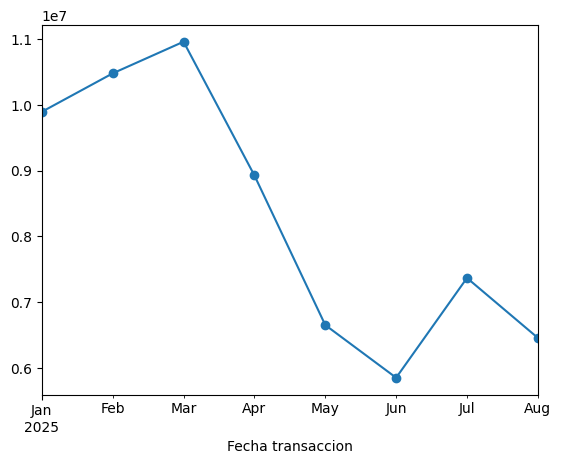

In [18]:
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Saldo"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

<Axes: xlabel='Fecha transaccion'>

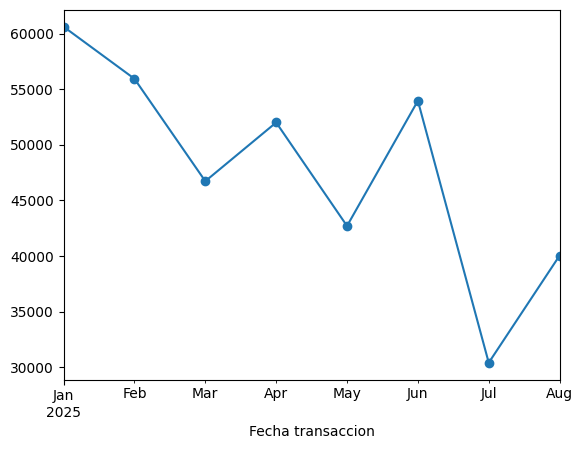

In [19]:
mensual =  df.groupby(df["Fecha transaccion"].dt.to_period("M"))["Abonos"].mean()
mensual[mensual.notna()].plot(kind="line", marker='o')      

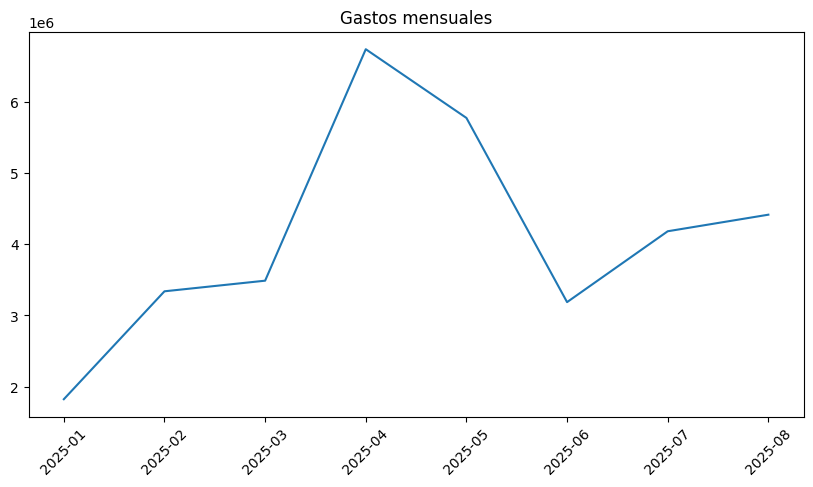

In [20]:
# Estacionalidad mis datos 

df["mes"] = df["Fecha transaccion"].dt.to_period("M")
gastos_mes = df.groupby("mes")["Cargos"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(gastos_mes["mes"].astype(str), gastos_mes["Cargos"])
plt.title("Gastos mensuales")
plt.xticks(rotation=45)
plt.show()

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# si tu índice es una fecha
gastos_mes.index = pd.PeriodIndex(gastos_mes["mes"], freq="M")
result = seasonal_decompose(gastos_mes["Cargos"], model="additive", period=12)
result.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 8 observation(s)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(gastos_mes["Cargos"])
plt.show()

In [ ]:
#z-score Transacciones atípicas o picos inusuales (z-score o IQR)
import numpy as np

# Calcular z-score
df["zscore_cargos"] = (df["Cargos"] - df["Cargos"].mean()) / df["Cargos"].std()

# Filtrar transacciones con z-score alto (picos)
outliers_z = df[np.abs(df["zscore_cargos"]) > 3]

print(outliers_z[["Fecha transaccion", "Descripcion", "Cargos", "zscore_cargos"]])

In [ ]:
#quantile IQR
Q1 = df["Cargos"].quantile(0.25)
Q3 = df["Cargos"].quantile(0.75)
IQR = Q3 - Q1

# Rango permitido
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Detectar outliers
outliers_iqr = df[(df["Cargos"] < lower) | (df["Cargos"] > upper)]

print(outliers_iqr[["Fecha transaccion", "Descripcion", "Cargos"]])

In [ ]:
gastos_diarios = df.groupby("Fecha transaccion")["Cargos"].sum().reset_index()
Q1 = gastos_diarios["Cargos"].quantile(0.25)
Q3 = gastos_diarios["Cargos"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filtrar días con gasto fuera del rango
dias_fuera_patron = gastos_diarios[
    (gastos_diarios["Cargos"] < lower) | (gastos_diarios["Cargos"] > upper)
]

print(dias_fuera_patron)

In [ ]:
#Días con gasto fuera de patrón
plt.figure(figsize=(10,5))
plt.plot(gastos_diarios["Fecha transaccion"], gastos_diarios["Cargos"], label="Gasto diario", color="skyblue")
plt.scatter(dias_fuera_patron["Fecha transaccion"], dias_fuera_patron["Cargos"], color="red", label="Fuera de patrón")
plt.title("Días con gasto fuera de patrón")
plt.xlabel("Fecha")
plt.ylabel("Gasto diario (Cargos)")
plt.legend()
plt.show()